<a href="https://colab.research.google.com/github/Akshidha-Unni/NLP/blob/main/NLP_Text_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [1]:
pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21714 sha256=897b59d452bcba084c5cc15a1202c0bd9a00e54d91eb50ca68d16bc70c4c08db
  Stored in directory: /root/.cache/pip/wheels/5f/0d/0c/2062d8c1758b4b1a2e42b4a63e6660d9ec2ba9463cfee9eeab
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=fea41810ac93779ace809ad8b2c6bf9b98d67b22f26dce0c70e10fbf0d70e57e
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529

In [2]:
#installing rouge library
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Required Packages

In [61]:
import sumy
import nltk
nltk.download('punkt')
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Loading the source material to be summarised
source_material = "One of the biggest revolutions in mass media was the introduction and popularity of social media. And the impact of social media was and is so major that it began a completely new era. Some mentionable social media platforms are Facebook, Twitter, Instagram, Pinterest, Linkedin, Whatsapp, etc.The horizons of communication have tremendously expanded because of social media. Also, it is because of the advancement of technology that the pace of human life has to speed up. Social media has received users from almost all generations, but the youngsters crowd social media the most. The youth also create new trends to engage in and unify, but those are temporary as compared to trends that dominated in earlier times.Social media has helped connect people from all corners of Earth and resulted in the formation of a global community. Social media is also a platform where people can freely express themselves and their opinions on several topics, starting from politics to art. Social media has also helped businesses to reach a larger audience and reach out to their customers.But among all the good aspects of social media, one thing that almost everyone realizes is how addictive it is. Also, people seemed to have grown more emotionally distant because of social media. We must be careful about our activities on social media for our well-being."

In [5]:
#length of the source text
len(source_material)

1351

In [6]:
LANGUAGE = "english"
parser = PlaintextParser.from_string(source_material,Tokenizer(LANGUAGE))

## **Luhn's Heuristic Method**





In [7]:
#import LuhnSummarizer package from sumy package
from sumy.summarizers.luhn import LuhnSummarizer

In [8]:
#create the summarizer
Luhn_summarizer = LuhnSummarizer()

In [9]:
#Generate automatic summary using Luhn Summarizer
Luhn_summary = Luhn_summarizer(parser.document,sentences_count=2)

In [10]:
#output tuple
Luhn_summary

(<Sentence: The youth also create new trends to engage in and unify, but those are temporary as compared to trends that dominated in earlier times.Social media has helped connect people from all corners of Earth and resulted in the formation of a global community.>,
 <Sentence: Social media has also helped businesses to reach a larger audience and reach out to their customers.But among all the good aspects of social media, one thing that almost everyone realizes is how addictive it is.>)

In [11]:
#Convert the Luhn_summary tuple to string
summary_Luhn = ""
for sentence in Luhn_summary:
  summary_Luhn+=str(sentence)
print(summary_Luhn)

The youth also create new trends to engage in and unify, but those are temporary as compared to trends that dominated in earlier times.Social media has helped connect people from all corners of Earth and resulted in the formation of a global community.Social media has also helped businesses to reach a larger audience and reach out to their customers.But among all the good aspects of social media, one thing that almost everyone realizes is how addictive it is.


In [12]:
#length of the generated summary
print(len(summary_Luhn))

463


In [13]:
#reference summary created by online text summarizer - Quillbot
reference = "One of the biggest revolutions in mass media was the introduction and popularity of social media.Social media has received users from almost all generations, but the youngsters crowd social media the most.But among all the good aspects of social media, one thing that almost everyone realizes is how addictive it is.We must be careful about our activities on social media for our well-being."

In [14]:
#length of the reference summary
len(reference)

391

In [15]:
#import Rouge package from rouge library
from rouge import Rouge
ROUGE = Rouge()

In [16]:
#Compare generated summary with reference summary generated by online summarizer
ROUGE.get_scores(summary_Luhn,reference)

[{'rouge-1': {'r': 0.5306122448979592,
   'p': 0.43333333333333335,
   'f': 0.47706421523440795},
  'rouge-2': {'r': 0.3387096774193548,
   'p': 0.2692307692307692,
   'f': 0.29999999506530617},
  'rouge-l': {'r': 0.5306122448979592,
   'p': 0.43333333333333335,
   'f': 0.47706421523440795}}]

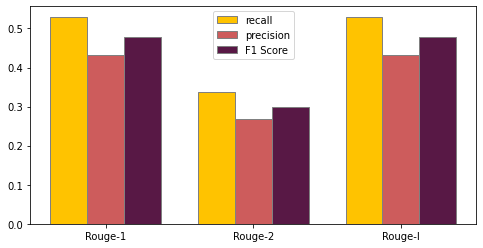

In [56]:
#Plot a bar graph to compare Rouge values
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))
re=[0.530, 0.338,0.530]
pr=[0.433,0.269, 0.433]
f1=[0.477,0.299,0.477]

br1 = np.arange(len(re))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1,re, color ='#FFC300', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br2,pr, color ='#CD5C5C', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3,f1, color ='#581845', width = barWidth,
        edgecolor ='grey', label ='F1 Score')

plt.xticks([r + barWidth for r in range(len(re))],
        ['Rouge-1','Rouge-2','Rouge-l'])
 
plt.legend()
plt.show()

## **Kullback-Leibler Sum**

In [18]:
#import KLSummarizer package from sumy Library
from sumy.summarizers.kl import KLSummarizer

In [19]:
#create the summarizer
summarizer = KLSummarizer()

In [20]:
#Generate automatic summary using KL Summarizer
testsummaryKL = summarizer(parser.document,sentences_count=4)

In [21]:
#convert testsummaryKL tuple to string
summaryKL = ""
for sentence in testsummaryKL:
  summaryKL+=str(sentence)
print(summaryKL)

Some mentionable social media platforms are Facebook, Twitter, Instagram, Pinterest, Linkedin, Whatsapp, etc.The horizons of communication have tremendously expanded because of social media.Also, it is because of the advancement of technology that the pace of human life has to speed up.Social media has received users from almost all generations, but the youngsters crowd social media the most.Also, people seemed to have grown more emotionally distant because of social media.


In [22]:
#length of the obtained summary
len(summaryKL)

478

In [23]:
#Compare generated summary with reference summary generated by online summarizer
ROUGE.get_scores(summaryKL,reference)

[{'rouge-1': {'r': 0.3877551020408163,
   'p': 0.36538461538461536,
   'f': 0.3762376187667876},
  'rouge-2': {'r': 0.3064516129032258,
   'p': 0.2878787878787879,
   'f': 0.29687499500488285},
  'rouge-l': {'r': 0.3469387755102041,
   'p': 0.3269230769230769,
   'f': 0.336633658370748}}]

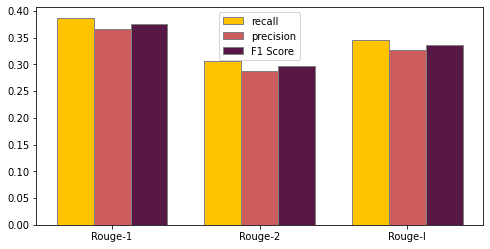

In [57]:
#Plot a bar graph to compare Rouge values
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))

re=[0.387,0.306,0.346]
pr=[0.365,0.287,0.326]
f1=[0.376,0.296,0.336]
 
br1 = np.arange(len(re))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1,re, color ='#FFC300', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br2,pr, color ='#CD5C5C', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3,f1, color ='#581845', width = barWidth,
        edgecolor ='grey', label ='F1 Score')

plt.xticks([r + barWidth for r in range(len(re))],
        ['Rouge-1','Rouge-2','Rouge-l'])
 
plt.legend()
plt.show()

## **Latent Semantic Analysis (LSA)**

In [24]:
#import LsaSummarizer package from sumy library
from sumy.summarizers.lsa import LsaSummarizer

In [25]:
#create the summarizer
summarizer = LsaSummarizer()

In [26]:
#Generate automatic summary using LSA Summarizer
testsummaryLSA = summarizer(parser.document,sentences_count=4)

In [27]:
#Convert testsummaryLSA tuple to string
summaryLSA = ""
for sentence in testsummaryLSA:
  summaryLSA+=str(sentence)
print(summaryLSA)

The youth also create new trends to engage in and unify, but those are temporary as compared to trends that dominated in earlier times.Social media has helped connect people from all corners of Earth and resulted in the formation of a global community.Social media is also a platform where people can freely express themselves and their opinions on several topics, starting from politics to art.Social media has also helped businesses to reach a larger audience and reach out to their customers.But among all the good aspects of social media, one thing that almost everyone realizes is how addictive it is.Also, people seemed to have grown more emotionally distant because of social media.


In [28]:
#Compare generated summary with reference summary generated by online summarizer
ROUGE.get_scores(summaryLSA,reference)

[{'rouge-1': {'r': 0.5510204081632653,
   'p': 0.3333333333333333,
   'f': 0.41538461068757404},
  'rouge-2': {'r': 0.3548387096774194,
   'p': 0.19642857142857142,
   'f': 0.25287355863125915},
  'rouge-l': {'r': 0.5306122448979592,
   'p': 0.32098765432098764,
   'f': 0.39999999530295866}}]

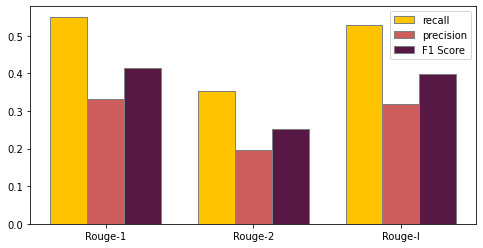

In [58]:
#Plot a bar graph to compare Rouge values
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))
 
re=[0.551,0.354,0.530]
pr=[0.333,0.196,0.320]
f1=[0.415,0.252,0.399]
 
br1 = np.arange(len(re))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1,re, color ='#FFC300', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br2,pr, color ='#CD5C5C', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3,f1, color ='#581845', width = barWidth,
        edgecolor ='grey', label ='F1 Score')

plt.xticks([r + barWidth for r in range(len(re))],
        ['Rouge-1','Rouge-2','Rouge-l'])
 
plt.legend()
plt.show()

## **TextRank**

In [29]:
#install gensim library
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#from gensim library import summarize function
import gensim
from gensim.summarization import summarize

In [31]:
#pass source_material to summarize function
summary_TR = summarize(source_material,word_count=100)
summary_TR

'Some mentionable social media platforms are Facebook, Twitter, Instagram, Pinterest, Linkedin, Whatsapp, etc.The horizons of communication have tremendously expanded because of social media.\nThe youth also create new trends to engage in and unify, but those are temporary as compared to trends that dominated in earlier times.Social media has helped connect people from all corners of Earth and resulted in the formation of a global community.\nSocial media is also a platform where people can freely express themselves and their opinions on several topics, starting from politics to art.\nAlso, people seemed to have grown more emotionally distant because of social media.'

In [32]:
#length of generated summary
len(summary_TR)

671

In [33]:
#compare TextRank generated summary with reference summary
ROUGE.get_scores(summary_TR,reference)

[{'rouge-1': {'r': 0.2857142857142857,
   'p': 0.18421052631578946,
   'f': 0.2239999952332801},
  'rouge-2': {'r': 0.06451612903225806,
   'p': 0.04081632653061224,
   'f': 0.04999999525312546},
  'rouge-l': {'r': 0.2653061224489796,
   'p': 0.17105263157894737,
   'f': 0.20799999523328008}}]

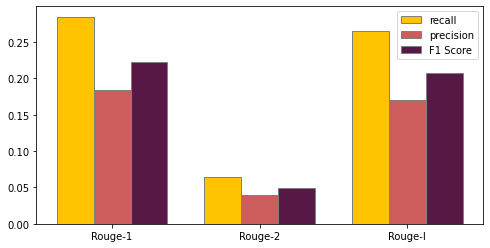

In [62]:
#Plot a bar graph to compare Rouge values
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))
 
re=[0.285,0.064,0.265]
pr=[0.184,0.040,0.171]
f1=[0.223,0.049,0.207]
 
br1 = np.arange(len(re))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1,re, color ='#FFC300', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br2,pr, color ='#CD5C5C', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3,f1, color ='#581845', width = barWidth,
        edgecolor ='grey', label ='F1 Score')

plt.xticks([r + barWidth for r in range(len(re))],
        ['Rouge-1','Rouge-2','Rouge-l'])
 
plt.legend()
plt.show()

Comparing the Rouge-1 values of each model


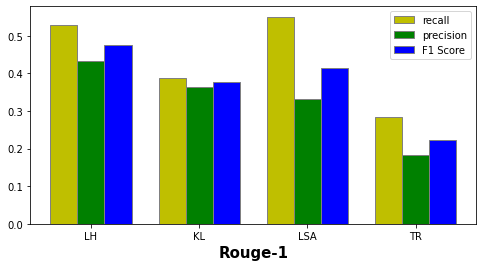

In [60]:
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))
 
re=[0.530,0.387,0.551,0.285]
pr=[0.433,0.365,0.333,0.184]
f1=[0.477,0.376,0.415,0.223]

br1 = np.arange(len(re))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1,re, color ='y', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br2,pr, color ='g', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3,f1, color ='b', width = barWidth,
        edgecolor ='grey', label ='F1 Score')
   
plt.xlabel('Rouge-1', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(re))],
        ['LH', 'KL', 'LSA', 'TR'])
 
plt.legend()
plt.show()